# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [ ]:
cd /content/drive/MyDrive/Classroom/Datasets and Dictionary/trip_records

/content/drive/MyDrive/Classroom/Datasets and Dictionary/trip_records


In [ ]:
ls

2023-10.parquet  2023-1.parquet  2023-4.parquet  2023-7.parquet
2023-11.parquet  2023-2.parquet  2023-5.parquet  2023-8.parquet
2023-12.parquet  2023-3.parquet  2023-6.parquet  2023-9.parquet


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

Load_One_TaxiRrecord = pd.read_parquet('2023-1.parquet')
Load_One_TaxiRrecord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
dir_path = '/content/drive/MyDrive/Classroom/Datasets and Dictionary/trip_records'

# Create a list of all the twelve files to read

# initialise an empty dataframe
df = pd.DataFrame()

from tqdm import tqdm
# iterate through the list of files and sample one by one:
for file_name in tqdm(os.listdir(dir_path)):
    try:
        # file path for the current file
        file_path = os.path.join(dir_path, file_name)

        print(f"Processing file: {file_name}")

        # Reading the current file
        ip = pd.read_parquet(file_path) #reading all 12 files one by one

        # Ensure the pickup datetime column is in datetime format
        ip['tpep_pickup_datetime'] = pd.to_datetime(ip['tpep_pickup_datetime'])

        # Extract date and hour
        ip['pickup_date'] = ip['tpep_pickup_datetime'].dt.date #extracting date
        ip['pickup_hour'] = ip['tpep_pickup_datetime'].dt.hour #extracting hour

        #Getting all the unique date from one month
        dates = ip['pickup_date'].unique()

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in dates:
          date_df = ip[ip['pickup_date'] == date]  # select one date from pickup_date
          hours = date_df['pickup_hour'].unique() # above selected dates, fetch the different values of hours

          #get the each hours for fetched date
          for hour in hours:
            hour_data = date_df[date_df['pickup_hour'] == hour]

            # Sample 5% of the hourly data randomly
            if not hour_data.empty:
              sample = hour_data.sample(frac = 0.05, random_state = 42)

              # add data of this hour to the dataframe
              sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

  0%|          | 0/12 [00:00<?, ?it/s]

Processing file: 2023-1.parquet


  8%|▊         | 1/12 [00:26<04:53, 26.72s/it]

Processing file: 2023-2.parquet


 17%|█▋        | 2/12 [00:56<04:45, 28.55s/it]

Processing file: 2023-3.parquet


 25%|██▌       | 3/12 [01:21<04:03, 27.05s/it]

Processing file: 2023-4.parquet


 33%|███▎      | 4/12 [01:42<03:16, 24.54s/it]

Processing file: 2023-5.parquet


 42%|████▏     | 5/12 [02:02<02:40, 22.95s/it]

Processing file: 2023-6.parquet


 50%|█████     | 6/12 [02:29<02:24, 24.13s/it]

Processing file: 2023-7.parquet


 58%|█████▊    | 7/12 [03:00<02:11, 26.37s/it]

Processing file: 2023-8.parquet


 67%|██████▋   | 8/12 [03:23<01:41, 25.43s/it]

Processing file: 2023-9.parquet


 75%|███████▌  | 9/12 [03:45<01:12, 24.26s/it]

Processing file: 2023-10.parquet


 83%|████████▎ | 10/12 [04:10<00:48, 24.45s/it]

Processing file: 2023-11.parquet


 92%|█████████▏| 11/12 [04:33<00:24, 24.20s/it]

Processing file: 2023-12.parquet


100%|██████████| 12/12 [04:59<00:00, 24.98s/it]


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_df.parquet'
df.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_df.parquet


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'Airport_fee'],
      dtype='object')

In [ ]:
cd /content/drive/MyDrive/Classroom/Upgrad - DSC76

/content/drive/MyDrive/Classroom/Upgrad - DSC76


In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet
Yellow_Taxi_df.parquet             Yellow_Taxi_NYC_Data_zone.parquet


In [ ]:
df1 = pd.read_parquet('/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_df.parquet')
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   

         airport_fee  pickup_date  pickup_hour Airport_fee  
428             1.25   2023-01-01            0         NaN  
1113            0.00   2023-01-01            0         NaN  
819             0.00   2023-01-01            0         NaN  
3192            0.00   2023-01-01            0         NaN  
2995263          NaN   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [ ]:
df1.store_and_fwd_flag.value_counts(normalize=True)

store_and_fwd_flag
N    0.993864
Y    0.006136
Name: proportion, dtype: float64

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
cd /content/drive/MyDrive/Classroom

/content/drive/MyDrive/Classroom


In [ ]:
cd Upgrad\ -\ DSC76

/content/drive/MyDrive/Classroom/Upgrad - DSC76


In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet
Yellow_Taxi_df.parquet             Yellow_Taxi_NYC_Data_zone.parquet


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [ ]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'Airport_fee'],
      dtype='object')

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df1 = df1.drop(columns='store_and_fwd_flag', axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 3196303
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  object        
 15  total_amount           object        
 16  congestion_surcharge   object        
 17  pickup_date            object        
 18  pickup_hour            in

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
df1.columns #checking that how many columns with name 'airport_fee' containing our data set

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'Airport_fee'],
      dtype='object')

In [ ]:
# Combine the two airport fee columns
df1['Airport_fee'] = df1['Airport_fee'].add(df1['airport_fee'], fill_value=0)
df1.drop(columns='airport_fee', axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 3196303
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date            ob

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
negative_fare_trips = df1[df1['fare_amount'] < 0] #No negative values found in fare_amount variable
negative_fare_trips

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
df1.fare_amount.describe()

count    1.896400e+06
mean     1.991935e+01
std      1.055371e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64

In [ ]:
negative_fare_amount_trips = df1[df1['fare_amount'] < 0]['fare_amount'].value_counts() #No negative values found in fare_amount variable
negative_fare_amount_trips

Series([], Name: count, dtype: int64)

In [ ]:
df1.fare_amount.describe() #No negative values found in fare_amount variable

count    1.896400e+06
mean     1.991935e+01
std      1.055371e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64

Did you notice something different in the `RatecodeID` column for above records?

Yes, in RatecodeID, we have found something which is not fit to the category of RatecodeID, '99.0' is the other category which is different from rest category.

In [ ]:
# Analyse RatecodeID for the negative fare amounts
# Yes, in RatecodeID, we have found 99.0 cell value which is not fit to the category of RatecodeID, Either we can remove all the rows containing 99.0 in RatecodeID. Also, No negative values found in fare_amount column
df1.RatecodeID.value_counts()

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [ ]:
df1.RatecodeID.value_counts()

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [ ]:
# Find which columns have negative values
numeric_cols = df1.select_dtypes(include=np.number).columns
numeric_cols
# Iterate through the numerical columns
for col in numeric_cols:
    # Check if the minimum value in the column is less than 0
    if df1[col].min() < 0:
        display(f"Column '{col}' contains negative values.")

"Column 'extra' contains negative values."

"Column 'mta_tax' contains negative values."

"Column 'improvement_surcharge' contains negative values."

"Column 'total_amount' contains negative values."

"Column 'congestion_surcharge' contains negative values."

"Column 'Airport_fee' contains negative values."

In [ ]:
cd /content/drive/MyDrive/Classroom/Upgrad - DSC76/

/content/drive/MyDrive/Classroom/Upgrad - DSC76


In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet


In [ ]:
# fix these negative values
df1['extra'] = df1['extra'].apply(lambda x: x*0 if x < 0 else x) # Multipled negative values with zero, these 3 negative values will zero and no extra charge apply to any person.
df1['mta_tax'] = df1['mta_tax'].apply(lambda x: x+1 if x < 0 else x) #Added 1 because $0.5 will automatically add to every ride. So, negative values move to positive value which will charge $0.5 by default.
df1['improvement_surcharge'] = df1['improvement_surcharge'].apply(lambda x: x==0 if x < 0 else x) # Make every negative value to zero because, the percentage of 0 is very less.
df1['total_amount'] = df1['total_amount'].apply(lambda x: x==0 if x < 0 else x) #making negative values to zero as these are very less cells as compared to complete column
df1['congestion_surcharge'] = df1['congestion_surcharge'].apply(lambda x: x==0 if x < 0 else x) #making negative values to zero as these are very less cells as compared to complete column
df1['Airport_fee'] = df1['Airport_fee'].apply(lambda x: x==0.0 if x < 0 else x) #making negative values to zero as these are very less cells as compared to complete column

In [ ]:
# Find which columns have negative values
numeric_cols = df1.select_dtypes(include=np.number).columns
numeric_cols
# Iterate through the numerical columns
for col in numeric_cols:
    # Check if the minimum value in the column is less than 0
    if df1[col].min() < 0:
        display(f"Column '{col}' contains negative values.")

In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet'
df1.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")
df1.info()

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet
<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 3196303
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  object        
 15  total_amount           object        
 16  congestion_

In [ ]:
#negative_extra_trips = df1[df1['Airport_fee'] <= 0]['Airport_fee'].value_counts()
#negative_extra_trips

In [ ]:
## Find which columns have negative values
#numeric_cols = df1.select_dtypes(include=np.number).columns
#numeric_cols
## Iterate through the numerical columns
#for col in numeric_cols:
#    # Check if the minimum value in the column is less than 0
#    if df1[col].min() < 0:
#        display(f"Column '{col}' contains negative values.")


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
df1.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
pickup_date                  0
pickup_hour                  0
Airport_fee              64874
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
df1.passenger_count.isnull().sum()

np.int64(0)

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df1.isnull() # Displaying the rows with Null values.

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
428         False                 False                  False   
1113        False                 False                  False   
819         False                 False                  False   
3192        False                 False                  False   
2995263     False                 False                  False   
...           ...                   ...                    ...   
3196251     False                 False                  False   
3194866     False                 False                  False   
3195561     False                 False                  False   
3376497     False                 False                  False   
3196303     False                 False                  False   

         passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
428                False          False       False               False   
1113               False          False       False               False   
819                False          False       False               False   
3192               False          False       False               False   
2995263             True          False        True                True   
...                  ...            ...         ...                 ...   
3196251            False          False       False               False   
3194866            False          False       False               False   
3195561            False          False       False               False   
3376497             True          False        True                True   
3196303            False          False       False               False   

         PULocationID  DOLocationID  payment_type  ...  mta_tax  tip_amount  \
428             False         False         False  ...    False       False   
1113            False         False         False  ...    False       False   
819             False         False         False  ...    False       False   
3192            False         False         False  ...    False       False   
2995263         False         False         False  ...    False       False   
...               ...           ...           ...  ...      ...         ...   
3196251         False         False         False  ...    False       False   
3194866         False         False         False  ...    False       False   
3195561         False         False         False  ...    False       False   
3376497         False         False         False  ...    False       False   
3196303         False         False         False  ...    False       False   

         tolls_amount  improvement_surcharge  total_amount  \
428             False                  False         False   
1113            False                  False         False   
819             False                  False         False   
3192            False                  False         False   
2995263         False                  False         False   
...               ...                    ...           ...   
3196251         False                  False         False   
3194866         False                  False         False   
3195561         False                  False         False   
3376497         False                  False         False   
3196303         False                  False         False   

         congestion_surcharge  airport_fee  pickup_date  pickup_hour  \
428                     False        False        False        False   
1113                    False        False        False        False   
819                     False        False        False        False   
3192                    False        False        False        False   
2995263                  True         True        False        False   
...                       ...          ...          ...          ...   
3196251                 False         True        False        False   
3194866                 False         True   

## Impute NaN values in 'passenger_count'

In [ ]:
df1.passenger_count.isnull().sum()
df1['passenger_count'] = df1['passenger_count'].fillna(0)
df1.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
pickup_date                  0
pickup_hour                  0
Airport_fee              64874
dtype: int64

Did you find zeroes in passenger_count? Handle these.

Ans: Yes, We have around 94555 count of zeroes value.

In [ ]:
df1.passenger_count.value_counts()

passenger_count
1.0    1377224
2.0     277298
0.0      94555
3.0      69034
4.0      38537
5.0      23871
6.0      15860
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

In [ ]:
#If passanger count is zero, means no one sharing cab with driver, so we can drop these rows which contain zero in 'passenger_count' column
indices_to_drop = df1[df1['passenger_count'] == 0.0].index  #Fetching all the index values which contain zero in passenger_count column
df1 =df1.drop(indices_to_drop) #Now, Dropping all the indexes from data set which contain zeroes in passenger_count column


In [ ]:
df1[df1['passenger_count'] == 0.0].index

Index([2995263, 2995167, 2995165, 2995317, 2995090, 2995067, 2995302, 2995038,
       2995238,    1622,
       ...
       3376243, 3376319, 3376291, 3376312, 3194610, 3376345, 3376187, 3376077,
       3376414, 3376497],
      dtype='int64', length=94555)

In [ ]:
df1.passenger_count.value_counts()

passenger_count
1.0    1355482
2.0     273118
3.0      68002
4.0      37924
5.0      23490
6.0      15616
8.0         11
7.0          5
9.0          4
Name: count, dtype: int64

In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet


In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet'
df1.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df1.isnull().sum() #As i can see, no missing values found in 'RatecodeID' column, because when we were performing operation on 'passenger_count' column, the same indexes with zeroes are also dropped.

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1773652 entries, 428 to 3196303
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  object        
 15  total_amount           object        
 16  congestion_surcharge   object        
 17  pickup_date            object        
 18  pickup_hour            in

In [ ]:
df.RatecodeID.value_counts()

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [ ]:
df1.RatecodeID.value_counts()

RatecodeID
1.0     1674143
2.0       69751
99.0      10275
5.0        9910
3.0        5933
4.0        3637
6.0           3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df1.head(2)
df1.congestion_surcharge.isna().sum() #no null values found

np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df1.isnull().sum() #no missing values

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

In [ ]:
missing_values_df = df1[df1['total_amount'] == ''] #No missing values found, checked with this command putting each column name here.
missing_values_df

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet


In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet'
df1.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

In [ ]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
428            7.74         1.0           138           256             2   
1113           1.24         1.0           161           237             1   
819            1.44         1.0           237           141             2   
3192           0.54         1.0           143           142             2   
4719           7.10         1.0           246            37             1   

      fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
428          32.4    6.0      0.5        0.00           0.0   
1113          7.9    1.0      0.5        2.58           0.0   
819          11.4    1.0      0.5        0.00           0.0   
3192          6.5    1.0      0.5        0.00           0.0   
4719         34.5    3.5      0.5        7.90           0.0   

     improvement_surcharge total_amount congestion_surcharge pickup_date  \
428                    1.0        41.15                  0.0  2023-01-01   
1113                   1.0        15.48                  2.5  2023-01-01   
819                    1.0         16.4                  2.5  2023-01-01   
3192                   1.0         11.5                  2.5  2023-01-01   
4719                   1.0         47.4                  2.5  2023-01-01   

      pickup_hour Airport_fee  
428             0        1.25  
1113            0         0.0  
819             0         0.0  
3192            0         0.0  
4719            0         0.0

Before we start fixing outliers, let's perform outlier analysis.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300

#df3 = pd.read_parquet('Yellow_Taxi_NYC_Data_df3.parquet')
#df3.info()

# Creating a new DataFrame with name trip_distance and fare amount from df3 (existing data frame)
high_fare_zero_distance_trips = df3[(df3['trip_distance'] == 0) & (df3['fare_amount'] > 300)][['trip_distance', 'fare_amount']].copy() # creating new data frame with 2 condition, high fare and distance zero

# Display the new DataFrame
high_fare_zero_distance_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trip_distance  0 non-null      float64
 1   fare_amount    0 non-null      float64
dtypes: float64(2)
memory usage: 0.0 bytes


In [ ]:
high_fare_zero_distance_trips

Empty DataFrame
Columns: [trip_distance, fare_amount]
Index: []

In [ ]:
# Entries where trip_distance is greater than 250 miles.

high_distance_ride = df3[df3['trip_distance'] > 250]
high_distance_ride.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
599066          2  2023-01-07 20:02:05   2023-01-07 20:07:10                1   
165836          2  2023-03-02 15:45:34   2023-03-02 16:00:45                1   
2749891         2  2023-06-26 13:45:44   2023-06-26 13:51:12                2   
572327          2  2023-02-06 19:56:52   2023-02-06 20:33:55                2   
992443          2  2023-02-10 19:53:45   2023-02-10 20:01:48                2   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
599066          721.26           1           145             7             1   
165836         9674.01           1           161            68             1   
2749891        6262.99           1            75           238             1   
572327         3317.68           2           132           186             1   
992443         9673.76           1           264           142             1   

         fare_amount  ...  congestion_surcharge  pickup_date  pickup_hour  \
599066           7.9  ...                   0.0   2023-01-07           20   
165836          14.2  ...                   2.5   2023-03-02           15   
2749891          7.9  ...                   0.0   2023-06-26           13   
572327          70.0  ...                   2.5   2023-02-06           19   
992443           8.6  ...                   2.5   2023-02-10           19   

         Airport_fee  pickup_day_of_week  pickup_month  Quater_By_Year  \
599066          0.00            Saturday             1               1   
165836          0.00            Thursday             3               1   
2749891         0.00              Monday             6               2   
572327          1.25              Monday             2               1   
992443          0.00              Friday             2               1   

          trip_duration  trip_duration_in_sec  payment_type_name  
599066  0 days 00:05:05                 305.0     1= Credit card  
165836  0 days 00:15:11                 911.0     1= Credit card  
2749891 0 days 00:05:28                 328.0     1= Credit card  
572327  0 days 00:37:03                2223.0     1= Credit card  
992443  0 days 00:08:03                 483.0     1= Credit card  

[5 rows x 26 columns]

In [ ]:
#	Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df3.payment_type.value_counts()  #-	There is no payment_type '0' found in the data set

payment_type
1    1369493
2         21
4         16
3          7
Name: count, dtype: int64

In [ ]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
zone_df = pd.read_parquet('Yellow_Taxi_NYC_Data_zone.parquet')
#zone_df.info()

zone_df[(zone_df['trip_distance'] == 0) & (zone_df['fare_amount'] == 0)] # no cell found with zero for trip_distance and fare_amount



Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee, pickup_day_of_week, pickup_month, Quater_By_Year, trip_duration, trip_duration_in_sec, payment_type_name]
Index: []

[0 rows x 26 columns]

In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df3.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_zone.parquet
Yellow_Taxi_NYC_Data_df1.parquet


In [ ]:
# remove passenger_count > 6
indices_to_drop = df1[df1['passenger_count'] > 6.0].index  #Will get the indexes which contain values more than 6
df1 =df1.drop(indices_to_drop) #Those more than 6.0 values will be drop by this
df1.passenger_count.value_counts()

passenger_count
1.0    1355472
2.0     273116
3.0      68002
4.0      37924
5.0      23490
6.0      15616
Name: count, dtype: int64

In [ ]:
df1.fare_amount.describe()

count    1.773652e+06
mean     1.987056e+01
std      1.090488e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64

In [ ]:
# Continue with outlier handling
df1.fare_amount.quantile([0.5, 0.7, 0.9, 0.95, 0.999, 0.9999, 1])

0.5000        13.50
0.7000        19.10
0.9000        42.20
0.9500        70.00
0.9990       150.00
0.9999       300.00
1.0000    143163.45
Name: fare_amount, dtype: float64

In [ ]:
df1.total_amount.dtype

dtype('float64')

In [ ]:
# Do any columns need standardising?
#Yes, all values of 'Total amount' column should be in float and 'RatecodeID & passenger_count' both shoud be in integer.
df1['total_amount'] = df1['total_amount'].astype('float64') # Converting all values of 'Total Amount' column in float64
df1[['RatecodeID','passenger_count']] = df1[['RatecodeID','passenger_count']].astype('Int64')  # Converting all values of 'RatecodeID','passenger_count' column in Int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour', 'Airport_fee'],
      dtype='object')

In [ ]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

In [ ]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
428         2  2023-01-01 00:07:18   2023-01-01 00:23:15               1   
1113        2  2023-01-01 00:16:41   2023-01-01 00:21:46               2   
819         2  2023-01-01 00:14:03   2023-01-01 00:24:36               3   
3192        2  2023-01-01 00:24:30   2023-01-01 00:29:55               1   
4719        1  2023-01-01 00:42:56   2023-01-01 01:16:33               2   

     trip_distance RatecodeID PULocationID DOLocationID payment_type  \
428           7.74          1          138          256            2   
1113          1.24          1          161          237            1   
819           1.44          1          237          141            2   
3192          0.54          1          143          142            2   
4719          7.10          1          246           37            1   

      fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
428          32.4  ...      0.5        0.00           0.0   
1113          7.9  ...      0.5        2.58           0.0   
819          11.4  ...      0.5        0.00           0.0   
3192          6.5  ...      0.5        0.00           0.0   
4719         34.5  ...      0.5        7.90           0.0   

      improvement_surcharge  total_amount  congestion_surcharge  pickup_date  \
428                     1.0         41.15                   0.0   2023-01-01   
1113                    1.0         15.48                   2.5   2023-01-01   
819                     1.0         16.40                   2.5   2023-01-01   
3192                    1.0         11.50                   2.5   2023-01-01   
4719                    1.0         47.40                   2.5   2023-01-01   

     pickup_hour Airport_fee   trip_duration  
428            0        1.25 0 days 00:15:57  
1113           0        0.00 0 days 00:05:05  
819            0        0.00 0 days 00:10:33  
3192           0        0.00 0 days 00:05:25  
4719           0        0.00 0 days 00:33:37  

[5 rows x 21 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1773620 entries, 428 to 3196303
Data columns (total 21 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               category       
 1   tpep_pickup_datetime   datetime64[us] 
 2   tpep_dropoff_datetime  datetime64[us] 
 3   passenger_count        category       
 4   trip_distance          category       
 5   RatecodeID             category       
 6   PULocationID           category       
 7   DOLocationID           category       
 8   payment_type           category       
 9   fare_amount            float64        
 10  extra                  float64        
 11  mta_tax                float64        
 12  tip_amount             float64        
 13  tolls_amount           float64        
 14  improvement_surcharge  float64        
 15  total_amount           float64        
 16  congestion_surcharge   float64        
 17  pickup_date            object         
 18  picku

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: int64
* `tpep_pickup_datetime`:datetime64[us]
* `tpep_dropoff_datetime`: datetime64[us]
* `passenger_count`: Int64
* `trip_distance`:  float64
* `RatecodeID`: Int64
* `PULocationID`: int64
* `DOLocationID`: int64
* `payment_type`: int64
* `pickup_hour`: int32
* `trip_duration`: timedelta64[us]


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: numerical
* `extra`: categorical
* `mta_tax`: categorical
* `tip_amount`: categorical
* `tolls_amount`: numerical
* `improvement_surcharge`: categorical
* `total_amount`: numerical
* `congestion_surcharge`: categorical
* `airport_fee`: categorical

In [ ]:
#df1['tpep_pickup_datetime'] = df1['tpep_pickup_datetime'].astype('datetime64[us]')
#df1['tpep_dropoff_datetime'] = df1['tpep_dropoff_datetime'].astype('datetime64[us]')

In [ ]:
#df1['trip_duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']

In [ ]:
#df1['RatecodeID'] = df1['RatecodeID'].astype('category')
#df1['VendorID'] = df1['VendorID'].astype('category')
#df1['payment_type'] = df1['payment_type'].astype('category')
#df1['PULocationID'] = df1['PULocationID'].astype('category')
#df1['DOLocationID'] = df1['DOLocationID'].astype('category')
#df1['tpep_pickup_datetime'] = df1['tpep_pickup_datetime'].astype('datetime64[us]')
#df1['tpep_dropoff_datetime'] = df1['tpep_dropoff_datetime'].astype('datetime64[us]')
#df1['passenger_count'] = df1['passenger_count'].astype('category')
#df1['trip_distance'] = df1['trip_distance'].astype('category')
#df1['pickup_hour'] = df1['pickup_hour'].astype('category')

In [ ]:
cd ..

/content/drive/MyDrive/Classroom/Datasets and Dictionary


In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet


In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet'
df1.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet


In [ ]:
df1

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4719            1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   
...           ...                  ...                   ...              ...   
3195651         2  2023-12-31 23:38:35   2024-01-01 00:05:50                5   
3196251         2  2023-12-31 23:44:09   2023-12-31 23:50:04                1   
3194866         2  2023-12-31 23:44:04   2024-01-01 00:03:36                1   
3195561         2  2023-12-31 23:37:20   2023-12-31 23:41:18                1   
3196303         2  2023-12-31 23:35:11   2024-01-01 00:15:03                5   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
428               7.74           1           138           256             2   
1113              1.24           1           161           237             1   
819               1.44           1           237           141             2   
3192              0.54           1           143           142             2   
4719              7.10           1           246            37             1   
...                ...         ...           ...           ...           ...   
3195651           9.29           1            48            25             1   
3196251           0.81           1           263           262             1   
3194866           5.78           1           161           261             1   
3195561           1.06           1            79           137             1   
3196303           8.45           1           142           261             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
428             32.4  ...      0.5        0.00           0.0   
1113             7.9  ...      0.5        2.58           0.0   
819             11.4  ...      0.5        0.00           0.0   
3192             6.5  ...      0.5        0.00           0.0   
4719            34.5  ...      0.5        7.90           0.0   
...              ...  ...      ...         ...           ...   
3195651         41.5  ...      0.5        9.30           0.0   
3196251          7.2  ...      0.5        2.44           0.0   
3194866         27.5  ...      0.5        4.00           0.0   
3195561          7.2  ...      0.5        2.44           0.0   
3196303         40.8  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
4719                       1.0         47.40                   2.5   
...                        ...           ...                   ...   
3195651                    1.0         55.80                   2.5   
3196251                    1.0         14.64                   2.5   
3194866                    1.0         36.50                   2.5   
3195561                    1.0         14.64                   2.5   
3196303                    1.0         45.80                   2.5   

         pickup_date pickup_hour  Airport_fee   trip_duration  
428       2023-01-01           0         1.25 0 days 00:15:57  
1113      2023-01-01           0         0.00 0 days 00:05:05  
819       2023-01-01           0         0.00 0 days 00:10:33  
3192      2023-01-01           0         0.00 0 days 00:05:25  
4719      2023-01-01           0         0.00 0 days 00:33:37  
...              ...         ...          ...             ...  
3195651   2023-12

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

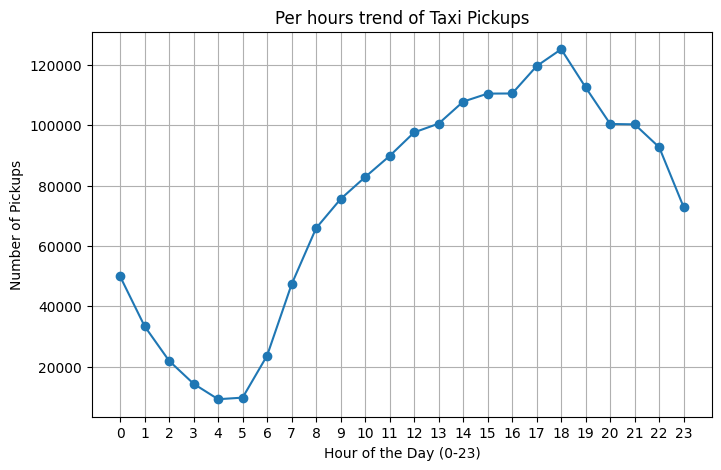

In [ ]:
# Find and show the hourly trends in taxi pickups
pickup_hours = df1['pickup_hour'].value_counts().sort_index() #Sorting hours by index

## Below is the per hour pickup trend

plt.figure(figsize=(8, 5)) # Setting the figure size
plt.plot(pickup_hours.index, pickup_hours.values, marker='o', linestyle='-') # Create the line plot
plt.title('Per hours trend of Taxi Pickups') # Title of the line plot
plt.xlabel('Hour of the Day (0-23)') #  Setting x-axis title
plt.xticks(pickup_hours.index) # Trend will be on basis of x-axis
plt.ylabel('Number of Pickups') # Setting y-axis title
plt.grid(True) # Add a grid for easier reading
plt.show() # Display the plot

In [ ]:
df1['pickup_day_of_week'] = pd.to_datetime(df1['pickup_date']).dt.day_name()
df1['pickup_day_of_week'].value_counts()

pickup_day_of_week
Thursday     278323
Wednesday    273087
Friday       263171
Saturday     258588
Tuesday      256433
Sunday       223434
Monday       220584
Name: count, dtype: int64

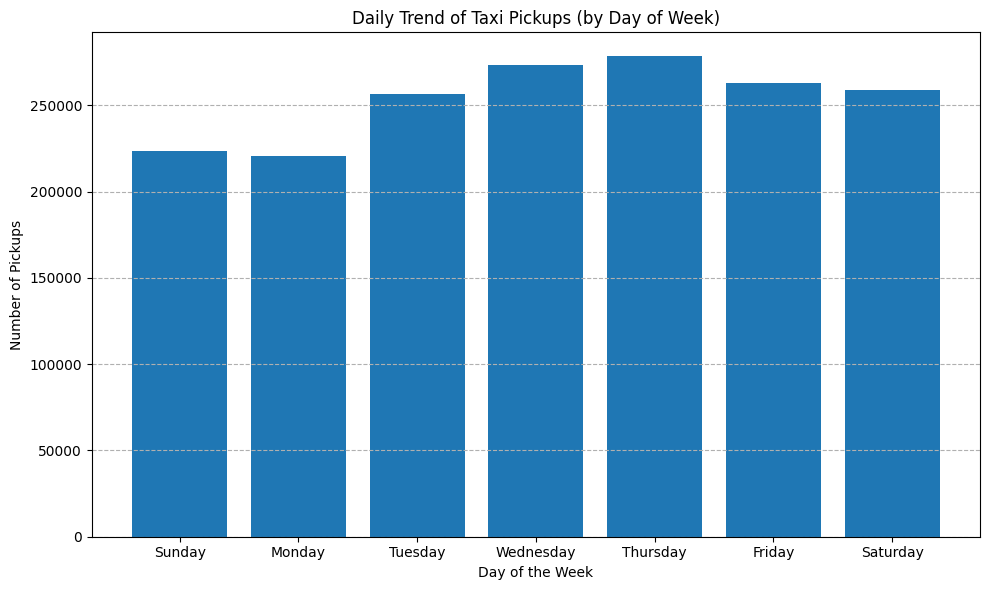

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)


daily_pickups = df1['pickup_date'].value_counts().sort_index()

#daily_pickups
df1['pickup_day_of_week'] = pd.to_datetime(df1['pickup_date']).dt.day_name()

# Count the number of pickups for each day of the week
daily_pickups_by_day_name = df1['pickup_day_of_week'].value_counts()
daily_pickups_by_day_name

# Define the desired order of the days of the week
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']
days_order

# Reindex the series to sort the days in the correct order
daily_pickups_by_day_name = daily_pickups_by_day_name.reindex(days_order)
daily_pickups_by_day_name

## Visualize daily pickup trends (by day of the week)

plt.figure(figsize=(10, 6)) # Set a suitable figure size
plt.bar(daily_pickups_by_day_name.index, daily_pickups_by_day_name.values) # Create the bar plot
plt.title('Daily Trend of Taxi Pickups (by Day of Week)') # Set the title
plt.xlabel('Day of the Week') # Label the x-axis
plt.ylabel('Number of Pickups') # Label the y-axis
plt.grid(axis='y', linestyle='--') # Add a horizontal grid
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

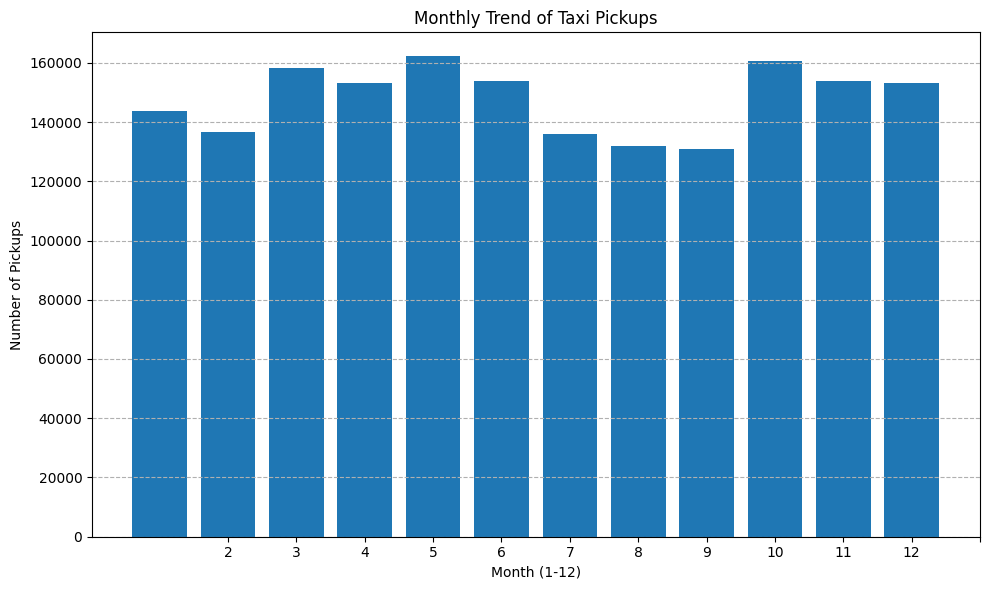

In [ ]:
# Show the monthly trends in pickups

# Extract the month from the pickup datetime
df1['pickup_month'] = df1['tpep_pickup_datetime'].dt.month

# Count the number of pickups for each month and sort by month
monthly_pickups = df1['pickup_month'].value_counts().sort_index()

## Visualize monthly pickup trends

plt.figure(figsize=(10, 6)) # Set a suitable figure size
plt.bar(monthly_pickups.index.astype(str), monthly_pickups.values) # Create the bar plot
plt.title('Monthly Trend of Taxi Pickups') # Set the title
plt.xlabel('Month (1-12)') # Label the x-axis
plt.ylabel('Number of Pickups') # Label the y-axis
plt.xticks(monthly_pickups.index) # Ensure all months are shown on the x-axis
plt.grid(axis='y', linestyle='--') # Add a horizontal grid
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
negative_fare_amount_trips = df1[df1['fare_amount'] <= 0]['fare_amount'].value_counts() # Counting negative or zeros values in 'fare_amount' variable
display(negative_fare_amount_trips)
negative_tip_amount_trips = df1[df1['tip_amount'] <= 0]['tip_amount'].value_counts() # Counting negative or zeros values in 'tip_amount' variable
display(negative_tip_amount_trips)
negative_total_amount_trips = df1[df1['total_amount'] <= 0]['total_amount'].value_counts() # Counting negative or zeros values in 'total_amount' variable
display(negative_total_amount_trips)
negative_trip_distance_trips = df1[df1['trip_distance'] <= 0]['trip_distance'].value_counts() # Counting negative or zeros values in 'trip_distance' variable
display(negative_trip_distance_trips)

fare_amount
0.0    584
Name: count, dtype: int64

tip_amount
0.0    396165
Name: count, dtype: int64

total_amount
0.0    351
Name: count, dtype: int64

trip_distance
0.0    21799
Name: count, dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Ans: Yes, we can leave out zero value from 'fare_amount', 'tip_amount', 'total_amount', and also 'trip_distance' on new Data Frame.

In [ ]:
# Create a df with non zero entries for the selected parameters.

df3 = df1[~ ((df1['fare_amount'] == 0) | (df1['tip_amount'] == 0) | (df1['total_amount'] == 0) | (df1['trip_distance'] == 0))].copy() # df3 is the new Data Frame which contains only non-zero values.

# Checking which above parameter contain zero in df3 Data Frame
negative_fare_amount_trips = df3[df3['fare_amount'] <= 0]['fare_amount'].value_counts() # Counting negative of zeros values in 'fare_amount' variable
display(negative_fare_amount_trips)
negative_tip_amount_trips = df3[df3['tip_amount'] <= 0]['tip_amount'].value_counts() # Counting negative of zeros values in 'tip_amount' variable
display(negative_tip_amount_trips)
negative_total_amount_trips = df3[df3['total_amount'] <= 0]['total_amount'].value_counts() # Counting negative of zeros values in 'total_amount' variable
display(negative_total_amount_trips)
negative_trip_distance_trips = df3[df3['trip_distance'] <= 0]['trip_distance'].value_counts() # Counting negative of zeros values in 'trip_distance' variable
display(negative_trip_distance_trips)


Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet


In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet'
df1.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df1.parquet


In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df3.parquet'
df3.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df3.parquet


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
df3.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
1548         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
2504         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
1686         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1113           1.24         1.0           161           237             1   
4719           7.10         1.0           246            37             1   
1548           1.59         1.0            79           164             1   
2504           3.16         1.0            79           256             1   
1686           7.64         1.0           132            95             1   

      fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
1113          7.9  ...      0.5        2.58           0.0   
4719         34.5  ...      0.5        7.90           0.0   
1548         11.4  ...      0.5        3.28           0.0   
2504         19.1  ...      0.5        6.02           0.0   
1686         31.7  ...      0.5        7.09           0.0   

      improvement_surcharge total_amount congestion_surcharge pickup_date  \
1113                    1.0        15.48                  2.5  2023-01-01   
4719                    1.0         47.4                  2.5  2023-01-01   
1548                    1.0        19.68                  2.5  2023-01-01   
2504                    1.0        30.12                  2.5  2023-01-01   
1686                    1.0        42.54                  0.0  2023-01-01   

     pickup_hour  Airport_fee month  
1113           0          0.0     1  
4719           0          0.0     1  
1548           0          0.0     1  
2504           0          0.0     1  
1686           0         1.25     1  

[5 rows x 21 columns]

In [ ]:
df3.drop('month',axis=1, inplace=True)

In [ ]:
# Group data by month and analyse monthly revenue

df3['month'] = df3['tpep_pickup_datetime'].dt.month # Extract the month number
monthly_revenue = df3.groupby('month')['total_amount'].sum() # By grouping month column and summing total amount by month and getting monthly revenue
display(monthly_revenue)

month
1     3122645.14
2     2978986.57
3      3554421.1
4     3463822.73
5     3782580.38
6     3569783.42
7      3041775.9
8     2948020.08
9     3116490.83
10    3836737.56
11    3625006.96
12    3534338.32
Name: total_amount, dtype: object

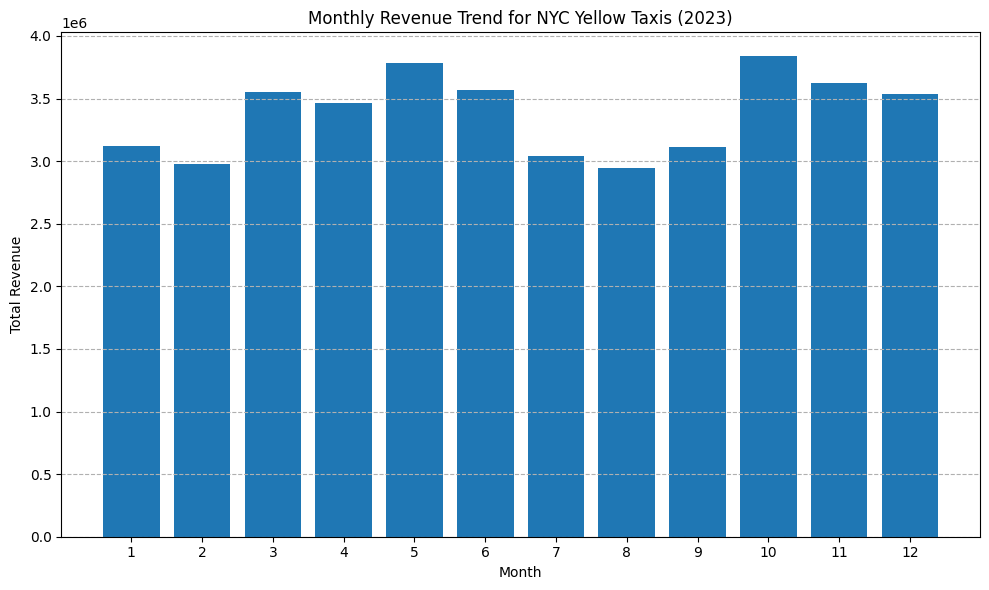

In [ ]:
# Plot the monthly revenue using a bar plot
plt.figure(figsize=(10, 6)) # Set a suitable figure size
plt.bar(monthly_revenue.index.astype(str), monthly_revenue.values) # Creating a bar plot
plt.title('Monthly Revenue Trend for NYC Yellow Taxis (2023)') # Set the title of the plot
plt.xlabel('Month') # Label the x-axis as 'Month'
plt.ylabel('Total Revenue') # Label the y-axis as 'Total Revenue'
plt.grid(axis='y', linestyle='--') # Add a horizontal grid
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
df3['Quater_By_Year'] = df3['tpep_pickup_datetime'].dt.quarter
quartly_proportation = df3.groupby('Quater_By_Year')['total_amount'].sum() # By grouping 'Quater_By_Year' column and summing total amount by Quater_By_Year and getting quarterly revenue
quartly_proportation # Proportation of each quarter

Quater_By_Year
1     9656052.810001
2    10816186.530001
3         9106286.81
4    10996082.840001
Name: total_amount, dtype: object

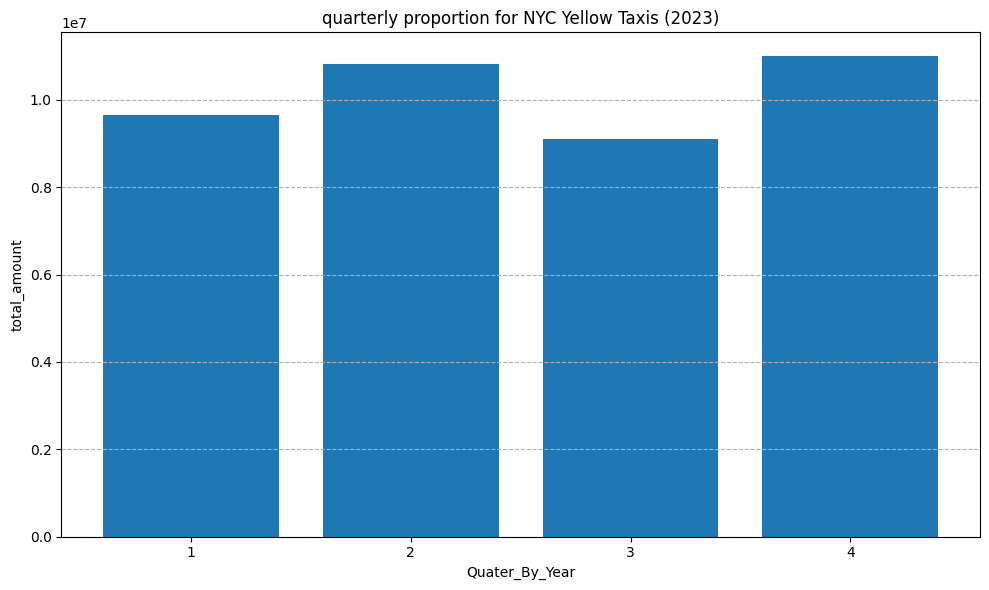

In [ ]:
# Plotting the proportion of each quarter using bar plot
plt.figure(figsize=(10, 6)) # Set a suitable figure size
plt.bar(quartly_proportation.index.astype(str), quartly_proportation.values) # Creating a bar plot
plt.title('quarterly proportion for NYC Yellow Taxis (2023)') # Set the title of the plot
plt.xlabel('Quater_By_Year') # Label the x-axis as 'Month'
plt.ylabel('total_amount') # Label the y-axis as 'Total Revenue'
plt.grid(axis='y', linestyle='--') # Add a horizontal grid
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

In [ ]:
df3.trip_distance.describe()

count    1.369554e+06
mean     3.499881e+00
std      2.573695e+01
min      1.000000e-02
25%      1.100000e+00
50%      1.810000e+00
75%      3.350000e+00
max      9.679360e+03
Name: trip_distance, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

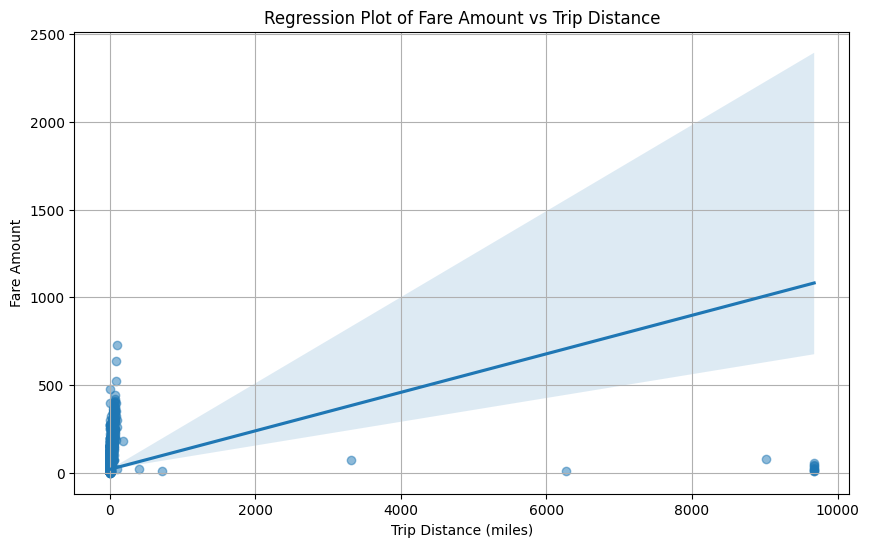

In [ ]:
plt.figure(figsize=[10, 6])
sns.regplot(x='trip_distance', y='fare_amount', data=df3, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [ ]:
df3[['trip_distance','fare_amount']].corr() #Correlation between 'trip_distance and fare_amount'

trip_distance  fare_amount
trip_distance       1.000000     0.164424
fare_amount         0.164424     1.000000

<Axes: >

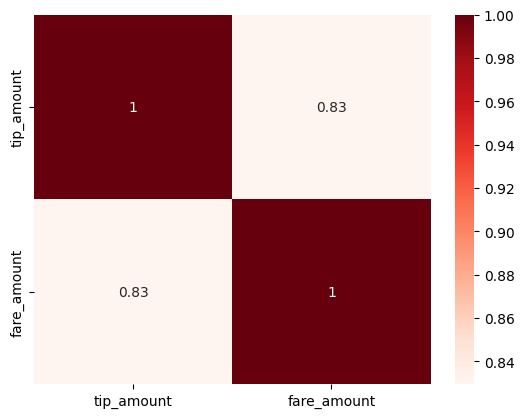

In [ ]:
sns.heatmap(df3[['tip_amount', 'fare_amount']].corr(),annot=True,cmap='Reds')

In [ ]:
df = pd.read_parquet('Yellow_Taxi_07June2025_df.parquet')

In [ ]:
ls

Yellow_Taxi_05June2025.parquet     Yellow_Taxi_NYC_Data_df1.parquet
Yellow_Taxi_07June2025_df.parquet  Yellow_Taxi_NYC_Data_df3.parquet


In [ ]:
df1 = pd.read_parquet('Yellow_Taxi_NYC_Data_df1.parquet')

In [ ]:
df3 = pd.read_parquet('Yellow_Taxi_NYC_Data_df3.parquet')

In [ ]:
df3.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   
1548         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
2504         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
1686         2  2023-01-01 00:44:09   2023-01-01 01:01:17                1   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1113           1.24           1           161           237             1   
4719           7.10           1           246            37             1   
1548           1.59           1            79           164             1   
2504           3.16           1            79           256             1   
1686           7.64           1           132            95             1   

      fare_amount  ...  improvement_surcharge  total_amount  \
1113          7.9  ...                    1.0         15.48   
4719         34.5  ...                    1.0         47.40   
1548         11.4  ...                    1.0         19.68   
2504         19.1  ...                    1.0         30.12   
1686         31.7  ...                    1.0         42.54   

      congestion_surcharge  pickup_date  pickup_hour  Airport_fee  \
1113                   2.5   2023-01-01            0         0.00   
4719                   2.5   2023-01-01            0         0.00   
1548                   2.5   2023-01-01            0         0.00   
2504                   2.5   2023-01-01            0         0.00   
1686                   0.0   2023-01-01            0         1.25   

      pickup_day_of_week pickup_month  month  Quater_By_Year  
1113              Sunday            1      1               1  
4719              Sunday            1      1               1  
1548              Sunday            1      1               1  
2504              Sunday            1      1               1  
1686              Sunday            1      1               1  

[5 rows x 24 columns]

In [ ]:
df3 = df3.drop('month', axis=1)

In [ ]:
df3.PULocationID.value_counts().unique()

array([67658, 65551, 62011, 61589, 51057, 50297, 47310, 46969, 43115,
       41843, 40511, 39743, 39115, 36256, 35389, 33776, 33740, 32900,
       32318, 30038, 27526, 27029, 27007, 26846, 23569, 23034, 22917,
       20769, 19578, 19262, 19041, 18716, 17061, 14876, 14558, 14420,
       12584, 12447, 11946, 10477, 10354,  8439,  7996,  7201,  7050,
        6725,  6260,  6225,  5712,  3351,  3173,  2462,  2066,  1628,
        1542,  1531,  1370,  1315,   626,   499,   489,   484,   473,
         439,   423,   376,   353,   352,   347,   303,   301,   299,
         282,   258,   252,   245,   238,   219,   167,   166,   147,
         134,   129,   122,   120,   112,   103,    88,    80,    76,
          73,    70,    68,    62,    59,    55,    53,    50,    49,
          48,    37,    36,    34,    32,    31,    29,    28,    26,
          25,    24,    23,    22,    19,    18,    17,    16,    15,
          14,    12,    11,     9,     8,     7,     6,     5,     4,
           3,     2,

In [ ]:
df3.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   
1548         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
2504         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
1686         2  2023-01-01 00:44:09   2023-01-01 01:01:17                1   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1113           1.24           1           161           237             1   
4719           7.10           1           246            37             1   
1548           1.59           1            79           164             1   
2504           3.16           1            79           256             1   
1686           7.64           1           132            95             1   

      fare_amount  ...  total_amount  congestion_surcharge  pickup_date  \
1113          7.9  ...         15.48                   2.5   2023-01-01   
4719         34.5  ...         47.40                   2.5   2023-01-01   
1548         11.4  ...         19.68                   2.5   2023-01-01   
2504         19.1  ...         30.12                   2.5   2023-01-01   
1686         31.7  ...         42.54                   0.0   2023-01-01   

      pickup_hour  Airport_fee  pickup_day_of_week  pickup_month  \
1113            0         0.00              Sunday             1   
4719            0         0.00              Sunday             1   
1548            0         0.00              Sunday             1   
2504            0         0.00              Sunday             1   
1686            0         1.25              Sunday             1   

     Quater_By_Year   trip_duration  trip_duration_in_sec  
1113              1 0 days 00:05:05                 305.0  
4719              1 0 days 00:33:37                2017.0  
1548              1 0 days 00:10:31                 631.0  
2504              1 0 days 00:15:53                 953.0  
1686              1 0 days 00:17:08                1028.0  

[5 rows x 25 columns]

In [ ]:
df3.tip_amount.value_counts()

tip_amount
2.00     88960
1.00     71012
3.00     47372
5.00     26928
2.80     21000
         ...  
88.08        1
46.01        1
30.51        1
40.09        1
38.34        1
Name: count, Length: 3717, dtype: int64

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

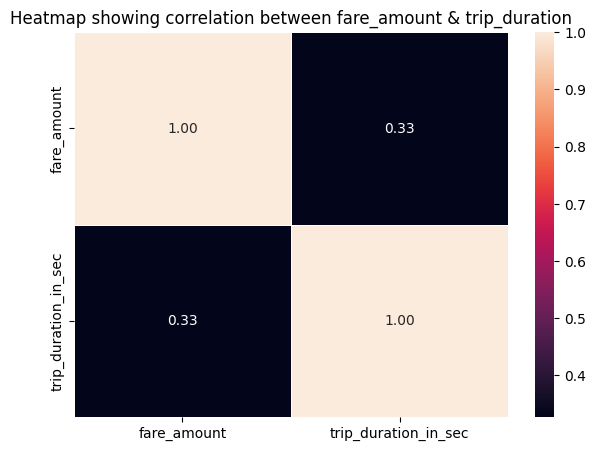

In [ ]:
# Show relationship between fare and trip duration

df3['trip_duration'] = df3['tpep_dropoff_datetime'] - df3['tpep_pickup_datetime'] # Calculating trip_duration of each ride and creating new column with name 'trip_duration'

df3['trip_duration_in_sec'] = (df3['trip_duration']).dt.total_seconds() # Creating new column with data of duration in seconds

corr_fare_tripDuration = df3[['fare_amount', 'trip_duration_in_sec']].corr()
corr_fare_tripDuration

#Portraying 'corr_fare_tripDuration' information as heat map

plt.figure(figsize= [7,5])
sns.heatmap(data = corr_fare_tripDuration, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap showing correlation between fare_amount & trip_duration')
plt.show()



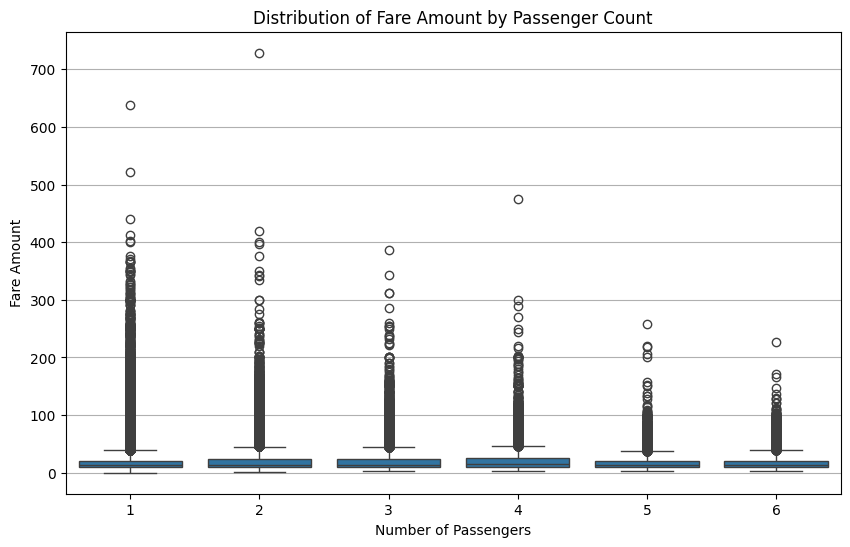

In [ ]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df3) # Creating boxplot to show relationship between 'No. of passenger & fare_amount'
plt.title('Distribution of Fare Amount by Passenger Count') # Title of the plot
plt.xlabel('Number of Passengers') # Setting x-axis title
plt.ylabel('Fare Amount') # Setting y-axis title
plt.grid(axis='y') # Add a grid
plt.show() # Display the plot

In [ ]:
df3.trip_duration_in_sec.value_counts().unique()

array([1396, 1387, 1366, ...,    3,    2,    1])

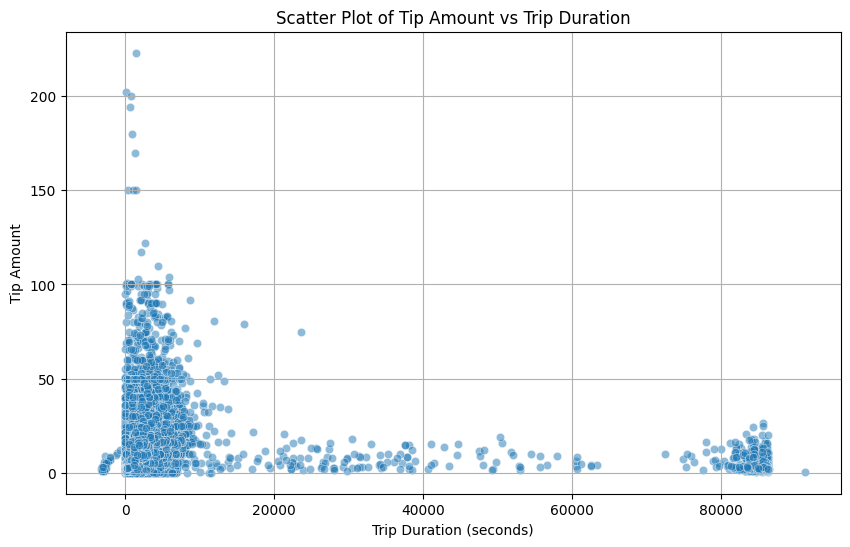

In [ ]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration_in_sec', y='tip_amount', data=df3, alpha=0.5)
plt.title('Scatter Plot of Tip Amount vs Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).

# Mapping categories of number to name
payment_type_map = {
    1: '1= Credit card',
    2: '2= Cash',
    3: '3= No charge',
    4: '4= Dispute'
}

df3['payment_type_name'] = df3['payment_type'].map(payment_type_map) # creating new column of payment name and mapping with numbers

df3['payment_type_name'].value_counts() # Getting payment type by name


payment_type_name
1= Credit card    1369510
2= Cash                21
4= Dispute             16
3= No charge            7
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
ls

taxi_zones.dbf  taxi_zones.sbn  taxi_zones.shp      taxi_zones.shx
taxi_zones.prj  taxi_zones.sbx  taxi_zones.shp.xml


In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [ ]:
zones.LocationID.value_counts().unique()

array([3, 2, 1])

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Axes: >

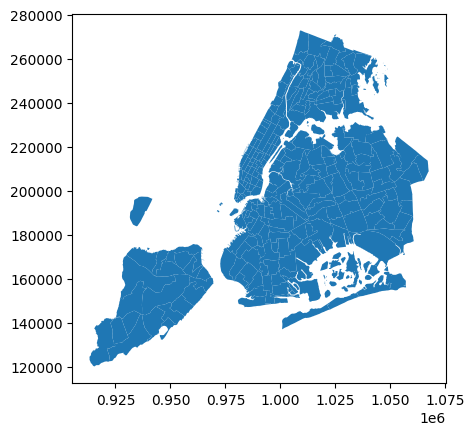

In [ ]:
#print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
merge_zone_tripRecord = pd.merge(zones, df3, left_on='LocationID', right_on='PULocationID', how='outer') # By using merge method, performing outer join and merge two data frames(zone & df(trip record))
merge_zone_tripRecord.head()

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0       1.0    0.116357    0.000782  Newark Airport         1.0     EWR   
1       1.0    0.116357    0.000782  Newark Airport         1.0     EWR   
2       1.0    0.116357    0.000782  Newark Airport         1.0     EWR   
3       1.0    0.116357    0.000782  Newark Airport         1.0     EWR   
4       1.0    0.116357    0.000782  Newark Airport         1.0     EWR   

                                            geometry  VendorID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...       2.0   
1  POLYGON ((933100.918 192536.086, 933091.011 19...       2.0   
2  POLYGON ((933100.918 192536.086, 933091.011 19...       2.0   
3  POLYGON ((933100.918 192536.086, 933091.011 19...       1.0   
4  POLYGON ((933100.918 192536.086, 933091.011 19...       2.0   

  tpep_pickup_datetime tpep_dropoff_datetime  ...  tolls_amount  \
0  2023-03-06 12:55:36   2023-03-06 12:55:55  ...          21.0   
1  2023-03-09 19:02:51   2023-03-09 19:02:56  ...           0.0   
2  2023-03-11 16:06:04   2023-03-11 16:06:18  ...           0.0   
3  2023-03-26 18:01:39   2023-03-26 18:02:01  ...           0.0   
4  2023-03-24 11:41:59   2023-03-24 11:42:06  ...           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  pickup_date  \
0                    1.0         136.8                   0.0   2023-03-06   
1                    1.0        145.62                   0.0   2023-03-09   
2                    1.0          73.2                   0.0   2023-03-11   
3                    1.0          70.0                   0.0   2023-03-26   
4                    1.0         151.2                   0.0   2023-03-24   

   pickup_hour  Airport_fee  month  Quater_By_Year  payment_type_name  
0         12.0          0.0    3.0             1.0     1= Credit card  
1         19.0          0.0    3.0             1.0     1= Credit card  
2         16.0          0.0    3.0             1.0     1= Credit card  
3         18.0          0.0    3.0             1.0     1= Credit card  
4         11.0          0.0    3.0             1.0     1= Credit card  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
Num_of_trip = merge_zone_tripRecord.groupby('LocationID')['total_amount'].count()
Num_of_trip

LocationID
1.0         34
2.0          2
3.0          0
4.0       1370
5.0          0
         ...  
259.0        0
260.0      103
261.0     6725
262.0    18716
263.0    27007
Name: total_amount, Length: 260, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones['Num_of_trip'] = merge_zone_tripRecord.groupby('LocationID')['total_amount'].count()
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'Num_of_trip'],
      dtype='object')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

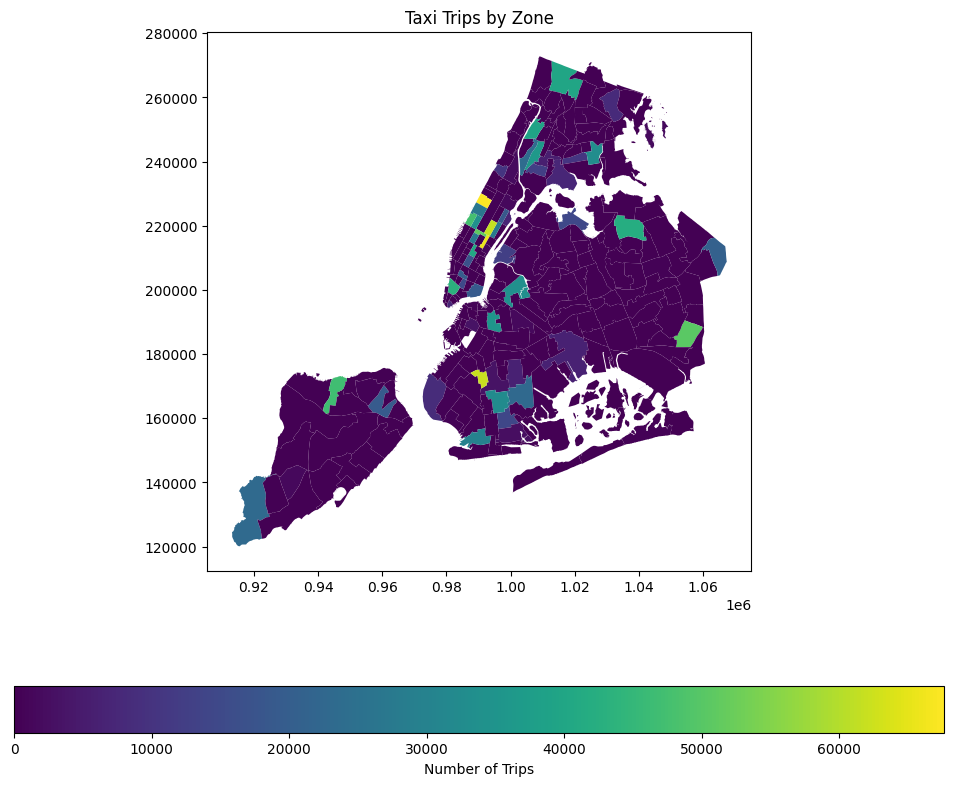

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='Num_of_trip', ax=ax, legend=True,
           legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Taxi Trips by Zone')
plt.show()


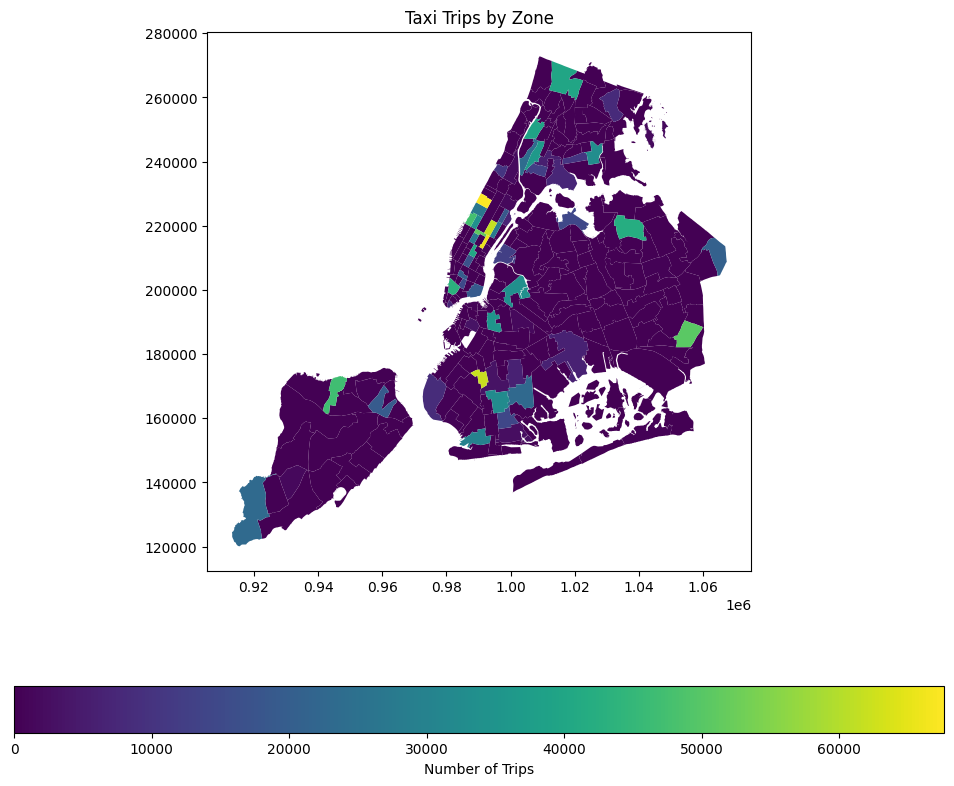

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

zones_sorted = zones.sort_values(by='Num_of_trip')

# Plot the map and display it
zones_sorted.plot(column='Num_of_trip', ax=ax, legend=True,
           legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Taxi Trips by Zone')
plt.show()

In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df3.parquet'
df3.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_df3.parquet


In [ ]:
save_path = '/content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_zone.parquet'
df3.to_parquet(save_path)
print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/Classroom/Upgrad - DSC76/Yellow_Taxi_NYC_Data_zone.parquet


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.